In [2]:
import numpy as np
import pandas as pd
from TO_sim.TLO import TLO_col,make_new_df,hysterisis_col,mf2_sets_TLO
from TO_sim.gen_Distribution import Normal
from parmap import parmap
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
m_set = np.arange(0.1,10+0.1/2,0.1).reshape(-1,1)
K = 0
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
N_set = len(m_set)
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set,1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets = (np.ones((N_set,1))*omega)


# m = 10
t_end = 500
dt =0.01
t = np.arange(0,t_end,dt)
dK = 0.1
K_end = 10
Ks = np.arange(0,K_end+dK/2,dK)
# theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m_set,N=N,K=K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))

In [3]:
df_Km,theta_col,dtheta_col = make_new_df(K,m_set[0],N = 500)
theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m_set,N=N,K=K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))
(last_theta,last_dtheta) = hysterisis_col(df_Km,(theta_set, dtheta_set,rs),theta_col,dtheta_col,K=K,m_set=m_set,N=N,omega=omega)

In [4]:
for K in tqdm(Ks[1:]):
    theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m_set,N=N,K=K,t_array=t,p_theta=last_theta,p_dtheta=last_dtheta,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))
    (last_theta,last_dtheta) = hysterisis_col(df_Km,(theta_set, dtheta_set,rs),theta_col,dtheta_col,K=K,m_set=m_set,N=N,omega=omega)

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
not_col = [i for i in df_Km.columns if ('list'  in i) or ('theta' in i)]
yes_col = [i for i in df_Km.columns if i not in not_col]
df_Km.sort_index()[yes_col].to_excel(f'N = {N} seed = {seed} dt = {dt} win {K_end} TLO.xlsm')
df_Km.sort_index()[not_col].to_excel(f'N = {N} seed = {seed} dt = {dt} win {K_end} cluster TLO.xlsm')

In [9]:
f'N = {N} seed = {seed} dt = {dt} win {K_end} TLO.xlsm'

'N = 500 seed = 10 dt = 0.01 win 10 TLO.xlsm'

In [10]:
df = df_Km.copy()

In [ ]:
m_i,m_end = 60,61
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.iloc[:,5:15]
    cluster_o = df_m.iloc[:,15:25]
    print(len(cluster_s['c1'].dropna()))
    plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
                s=50*np.ones((10,151))*rstd)
cbar = plt.colorbar()
cbar.set_label('cluster size')
plt.title(f'$m$ = [{ms[m_i]:.01f},{ms[m_end-1]:.01f}]')
plt.ylabel(r'cluster avg phase velocity')
plt.xlabel(r'Coupling constant : $K$')

In [139]:
np.argsort([1,5,3,2,5])

array([0, 3, 2, 1, 4])

In [38]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]

df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 win {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']

In [39]:
df = pd.read_excel('N = 500 seed = 10 dt = 0.1 win TLO.xlsm',index_col=[0,1])
df_b2 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 TLO.xlsm',index_col=[0,1])
df_b2 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 TLO.xlsm',index_col=[0,1])
df_b3 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 5-0 TLO.xlsm',index_col=[0,1])
df_b4 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 6-0 TLO.xlsm',index_col=[0,1])
df_b5 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 10-0 TLO.xlsm',index_col=[0,1])
df_b6 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 15-0 TLO.xlsm',index_col=[0,1])
df_bs_K = [3,4,5,6,10,15]

df_bs = [df_b2,df_b2,df_b3,df_b4,df_b5,df_b6]


In [9]:
re_df = df_b1.reset_index()

df_m = re_df[re_df.m == ms[m_idx]]

In [99]:
df_m.columns[6:16]

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'], dtype='object')

In [5]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4',
       'c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel',
       'c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel',
       'c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']


125


Text(0.5, 0, 'Coupling constant : $K$')

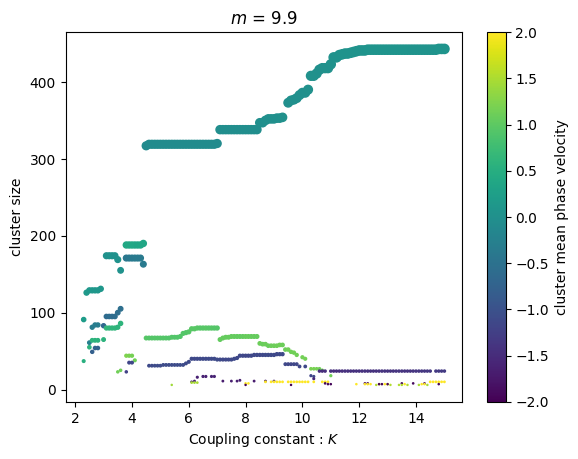

In [55]:
m_i,m_end = 99,100
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    print(len(cluster_s['c1'].dropna()))
    # plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
    #             s=50*np.ones((10,151))*rstd)
    plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=1,
                s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=1)
    

            
cbar = plt.colorbar()
cbar.set_label('cluster mean phase velocity')
plt.title(f'$m$ = {ms[m_i]:.01f}')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')

125
21
21
21
31
60
94


Text(0.5, 0, 'Coupling constant : $K$')

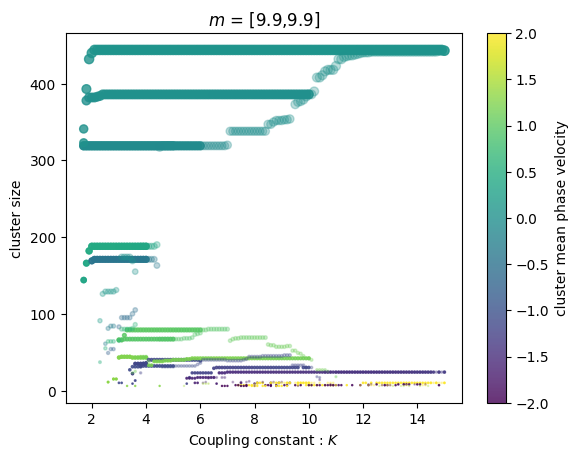

In [40]:
m_i,m_end = 99,100
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    print(len(cluster_s['c1'].dropna()))
    # plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
    #             s=50*np.ones((10,151))*rstd)
    plt.scatter(np.ones((10,151))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.3,
                s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=1)
    

for df_b in df_bs:
    for i in range(m_i,m_end):
        m_idx = i
        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == ms[m_idx]]
        Ks = df_m.K.to_numpy()
        rs = df_m.r.to_numpy()
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        cluster_s = df_m.loc[:,cluster_size]
        cluster_o = df_m.loc[:,cluster_pvel]
        print(len(cluster_s['c1'].dropna()))
        # plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
        #             s=50*np.ones((10,151))*rstd)
        plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.8,
                    s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,cmap='viridis',zorder=0)
            
cbar = plt.colorbar()
cbar.set_label('cluster mean phase velocity')
plt.title(f'$m$ = [{ms[m_i]:.01f},{ms[m_end-1]:.01f}]')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')

81
15
15
18
16
33
14


Text(0.5, 0, 'Coupling constant : $K$')

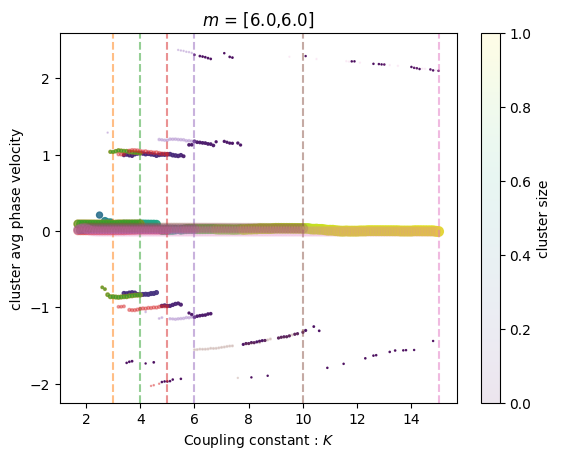

In [44]:
m_i = 60
m_end = m_i+1
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    print(len(cluster_s['c1'].dropna()))
    # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
    #             s=50*np.ones((10,len(Ks)))*rstd)
    plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.9,
                s=cluster_s.to_numpy().T*0.1,vmax=500,vmin=0)
    
num = 5
num_c = 0
for df_b,K_back in zip(df_bs,df_bs_K):
    num +=1
    num_c +=1
    for i in range(m_i,m_end):
        m_idx = i
        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == ms[m_idx]]
        Ks = df_m.K.to_numpy()
        rs = df_m.r.to_numpy()
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        cluster_s = df_m.loc[:,cluster_size]
        cluster_o = df_m.loc[:,cluster_pvel]
        print(len(cluster_s['c1'].dropna()))
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.5)   
        # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
        # #             s=50*np.ones((10,151))*rstd)
        # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=(12-num)*0.1,
        #             s=cluster_s.to_numpy().T*0.1,vmax=500,vmin=0,zorder=num)
        
        plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=tab_color_list[num_c],alpha=(12-num)*0.1,
                    s=cluster_s.to_numpy().T*0.1,zorder=num)
            
cbar = plt.colorbar()
cbar.set_label('cluster size')
plt.title(f'$m$ = [{ms[m_i]:.01f},{ms[m_end-1]:.01f}]')
plt.ylabel(r'cluster avg phase velocity')
plt.xlabel(r'Coupling constant : $K$')

In [16]:
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']

81


Text(0.5, 0, 'Coupling constant : $K$')

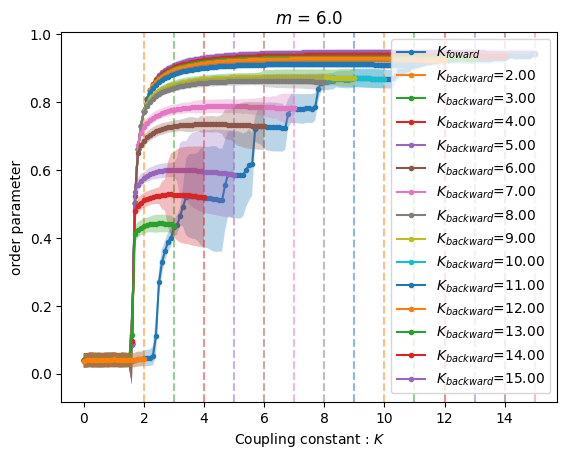

In [9]:
m_i,m_end = 60,61
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    print(len(cluster_s['c1'].dropna()))
    # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
    #             s=50*np.ones((10,len(Ks)))*rstd)
    # plt.errorbar(Ks,rs,rstd)
    plt.plot(Ks,rs,'.-',label=r'$K_{foward}$')
    plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
    # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.9,
    #             s=cluster_s.to_numpy().T*0.1,vmax=500,vmin=0)
    
num = len(df_b_dick)
num_c = 1
for K_back,df_b in df_b_dick.items():
    for i in range(m_i,m_end):
        m_idx = i
        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == ms[m_idx]]
        Ks = df_m.K.to_numpy()
        rs = df_m.r.to_numpy()
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        cluster_s = df_m.loc[:,cluster_size]
        cluster_o = df_m.loc[:,cluster_pvel]
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.5)   
        plt.plot(Ks,rs,'.-',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
        # plt.errorbar(Ks,rs,rstd,zorder= num)
    num -=1
    num_c +=1
plt.legend()
plt.title(f'$m$ = {ms[m_i]:.01f}')
plt.ylabel(r'order parameter')
plt.xlabel(r'Coupling constant : $K$')

In [45]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)

def get_omega(x):
    if np.isnan(x):
        return np.nan
    else: return omega[omega>0][int(x//2)]
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
m_to_draw = 6
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.loc[K_backs].r
O_ps = (K_rs*K_backs).apply(O_p,m=m_to_draw)

In [49]:
import TO_sim.analytical.order_parameter as ODER 
import imp
imp.reload(ODER)
KR0 = ODER.Make_empirical_KR_0
KR = ODER.Make_empirical_KR 
split_uo = ODER.split_uo

In [50]:
D_sets_op = {}
U_sets_op = {}
for K in K_backs:
    O = O_ps.loc[K]
    if ~np.isnan(O):
        D,U = KR0(m_to_draw,O)
        D_sets_op[K] = D
        U_sets_op[K] = U
    else:
        D_sets_op[K] = np.nan,np.nan
        U_sets_op[K] = np.nan,np.nan

In [52]:
def dK_graph(data,dK):
    ln_x , ln_y = map(np.array,data)
    ln_Ks = np.arange(ln_x[0],ln_x[-1],dK)
    ln_Kidx = np.searchsorted(ln_x,ln_Ks)
    ln_r = ln_y[ln_Kidx]
    return ln_Ks,ln_r


In [53]:
KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)
def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

Text(0.5, 0, 'Coupling constant : $K$')

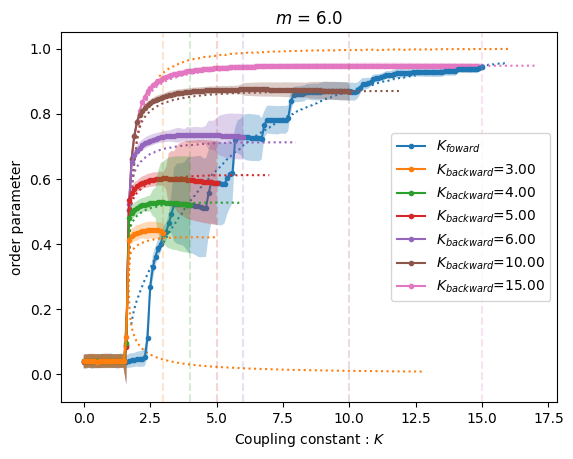

In [54]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.plot(Ks,rs,'.-',label=r'$K_{foward}$')
plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)

    
num = len(df_b_dick)
num_c = 1
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    plt.plot(Ks,rs,'.-',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    Ku,Ru = U_sets_op[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+2] 
        Ru_ = Ru[Ku<K_back+2] 
        plt.plot(Ku_,Ru_,':',color = tab_color_list[num_c],zorder= num)
    plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
plt.legend()


# plt.grid()
plt.plot(*KR_underK(F_new,16),':',color ='tab:blue',zorder=0)
plt.plot(*KR_underK(BU,16),':',color = 'tab:orange',zorder=0)
plt.plot(*KR_underK(BO,16),':',color = 'tab:orange',zorder=0)
plt.title(f'$m$ = {m_to_draw:.01f}')
plt.ylabel(r'order parameter')
plt.xlabel(r'Coupling constant : $K$')



103


NameError: name 'df_b_dick' is not defined

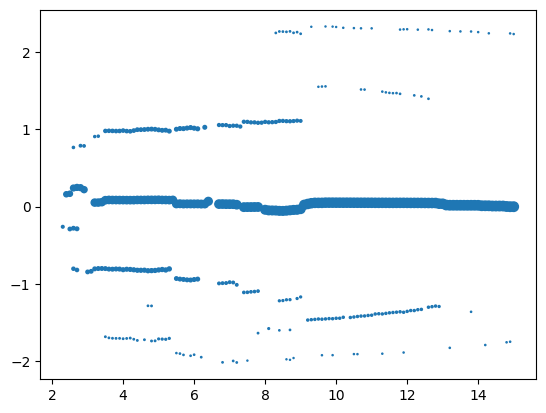

In [37]:
m_i,m_end = 81,82
for i in range(m_i,m_end):
    m_idx = i
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == ms[m_idx]]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    print(len(cluster_s['c1'].dropna()))
    # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
    #             s=50*np.ones((10,len(Ks)))*rstd)
    plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),#c=cluster_s.to_numpy().T,alpha=0.9,
                s=cluster_s.to_numpy().T*0.1,zorder=20)
    
num = 5

num_c = 0
for K_back,df_b in df_b_dick.items():
    num +=1
    num_c +=1

    for i in range(m_i,m_end):
        m_idx = i
        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == ms[m_idx]]
        Ks = df_m.K.to_numpy()
        rs = df_m.r.to_numpy()
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        cluster_s = df_m.loc[:,cluster_size]
        cluster_o = df_m.loc[:,cluster_pvel]
        print(len(cluster_s['c1'].dropna()))
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.5)   

        # plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
        #             s=50*np.ones((10,151))*rstd)
        plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),#c=cluster_s.to_numpy().T,alpha=(12-num)*0.1,
                    s=cluster_s.to_numpy().T*0.1,zorder=num,)
            
cbar = plt.colorbar()
cbar.set_label('cluster size')
plt.title(f'$m$ = [{ms[m_i]:.01f},{ms[m_end-1]:.01f}]')
plt.ylabel(r'cluster avg phase velocity')
plt.xlabel(r'Coupling constant : $K$')

## cluster 에서 확인

In [14]:
from TO_sim.analytical.order_parameter import Make_empirical_KR as AR

In [15]:
df_b3 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 3-0 TLO.xlsm',index_col=[0,1])
df_b4 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 TLO.xlsm',index_col=[0,1])
df_b5 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 5-0 TLO.xlsm',index_col=[0,1])
df_b6 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 6-0 TLO.xlsm',index_col=[0,1])
df_b10 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 10-0 TLO.xlsm',index_col=[0,1])
df_b15 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 15-0 TLO.xlsm',index_col=[0,1])

In [16]:
df_f_cluster = pd.read_excel('N = 500 seed = 10 dt = 0.1 win cluster TLO.xlsm',index_col=[0,1])
df_b4_cluster = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 cluster TLO.xlsm',index_col=[0,1])
df_b6_cluster = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 6-0 cluster TLO.xlsm',index_col=[0,1])

In [17]:
df_b10_cluster = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 10-0 cluster TLO.xlsm',index_col=[0,1])


In [18]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    return df_m,Ks

def to_Kr(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rsmax = df_m.rmax.to_numpy()
    rsmin = df_m.rmin.to_numpy()
    return Ks,rs,rsmin,rsmax

In [31]:
m_to_draw = 2
df_mf, Ksf = to_mdf(df_f_cluster,m_to_draw)
df_mb4, Ksb4 = to_mdf(df_b4_cluster,m_to_draw)
df_mb6, Ksb6 = to_mdf(df_b6_cluster,m_to_draw)
df_mb10, Ksb10 = to_mdf(df_b10_cluster,m_to_draw)


Ksf,rsf,rsf_min,rsf_max = to_Kr(df,m_to_draw)
Ksb4,rsb4,rsb4_min,rsb4_max = to_Kr(df_b4,m_to_draw)
Ksb6,rsb6 ,rsb6_min ,rsb6_max = to_Kr(df_b6,m_to_draw)
Ksb10,rsb10 ,rsb10_min ,rsb10_max = to_Kr(df_b10,m_to_draw)

In [32]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [33]:
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        return np.max(abs(cluster))
    else: return np.nan


def to_minomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        return np.min(abs(cluster))
    else: return np.nan


In [34]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)


In [35]:
KF,RF,KB,RB =AR(m_to_draw)

(0.0, 3.0)

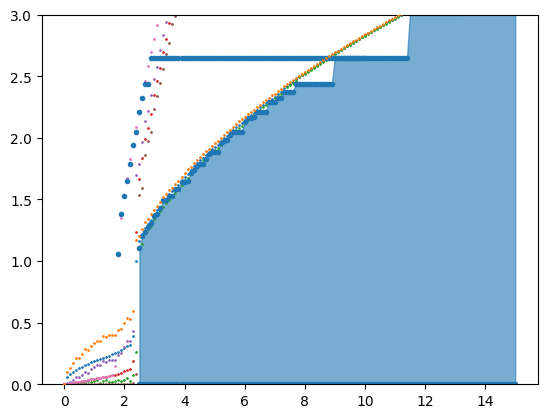

In [36]:
plt.plot(Ksf,df_mf['c0 list'].apply(to_maxomega),'.',color= 'tab:blue')
plt.plot(Ksf,df_mf['c0 list'].apply(to_minomega),'.',color= 'tab:blue')
plt.fill_between(Ksf,df_mf['c0 list'].apply(to_minomega),df_mf['c0 list'].apply(to_maxomega),color = 'tab:blue',alpha=0.6)
plt.fill_between(Ksf,df_mf['c1 list'].apply(to_minomega),df_mf['c1 list'].apply(to_maxomega),color = 'tab:orange',alpha=0.6)

# plt.plot(Ksf,df_mf['c1 list'].apply(to_maxomega),'.',color = 'tab:orange')
# plt.plot(Ksf,df_mf['c1 list'].apply(to_minomega),'.',color = 'tab:orange')


plt.plot(Ksf,df_mf['c2 list'].apply(to_minomega),'.',color = 'tab:green')
plt.plot(Ksf,df_mf['c2 list'].apply(to_maxomega),'.',color = 'tab:green')

# plt.plot(Ksb4,df_mb4['c0 list'].apply(to_maxomega),'.')
# plt.plot(Ksb4,df_mb4['c1 list'].apply(to_maxomega),'.')
# plt.plot(Ksb4,df_mb4['c2 list'].apply(to_maxomega),'.')

plt.scatter(Ksf,O_p(rsf*Ksf,m_to_draw),s=1)
plt.scatter(Ksf,O_p(rsf_max*Ksf,m_to_draw),s=1,zorder=3)
plt.scatter(Ksf,O_p(rsf_min*Ksf,m_to_draw),s=1)


plt.scatter(Ksf,rsf*Ksf,s=1)
plt.scatter(Ksf,rsf_max*Ksf,s=1)
plt.scatter(Ksf,rsf_min*Ksf,s=1)


# plt.plot(Ksb6,df_mb6['c0 list'].apply(to_maxomega),'.')
# plt.plot(Ksb6,df_mb6['c1 list'].apply(to_maxomega),'.')
# plt.plot(Ksb6,df_mb6['c2 list'].apply(to_maxomega),'.')
# plt.scatter(KB,RB*KB,s=1)
plt.scatter(Ksb10,rsb10*Ksb10,s=1)
# plt.scatter(Ksb10,O_p(rsb10*Ksb10,m_to_draw),s=1)
plt.plot(Ksb10,df_mb10['c0 list'].apply(to_maxomega),'.')
plt.plot(Ksb10,df_mb10['c1 list'].apply(to_maxomega),'.')
plt.plot(Ksb10,df_mb10['c2 list'].apply(to_maxomega),'.')

# plt.plot(Ksb10,df_mb10['c0 list'].apply(to_minomega),'.')
# plt.plot(Ksb10,df_mb10['c1 list'].apply(to_minomega),'.')
# plt.plot(Ksb10,df_mb10['c2 list'].apply(to_minomega),'.')
plt.ylim(0.,3)

## **Algorithms check re**

In [1]:
import numpy as np
import pandas as pd
from TO_sim.TLO import TLO,make_new_df
from TO_sim.gen_Distribution import Normal
from parmap import parmap
from parmap import starmap
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)
ms = np.arange(0,10+0.05,0.1)
K = 0
m = 0
dK = 0.1
K_end = 15
Ks = np.arange(0,K_end+dK/2,dK)
dtheta_init = 0*omega

df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
df_Km = df_Km.reset_index()

In [3]:
df_temp = TLO(6,theta_init=theta_init,dtheta_init = dtheta_init,omega=omega,Ks=Ks,N=N,t_end=500,dt = 0.1)

In [9]:
df_temp = df_temp.reset_index()

In [10]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4',
       'c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel',
       'c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel',
       'c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [11]:
df_temp

,index,K,m,r,rmin,rmax,rstd,rMM,error,c0,...,dtheta490,dtheta491,dtheta492,dtheta493,dtheta494,dtheta495,dtheta496,dtheta497,dtheta498,dtheta499
0,0,0.0,6,0.036818,0.000538,0.120787,0.0198,0.120249,NaN,NaN,...,2.19404,2.210857,2.288117,2.353115,2.353957,2.363694,2.373316,2.434315,2.436641,2.6489
1,1,0.1,6,0.037507,0.000353,0.12603,0.020039,0.125677,NaN,NaN,...,2.193355,2.211429,2.288686,2.35381,2.353025,2.362768,2.372607,2.434756,2.437451,2.648414
2,2,0.2,6,0.039896,0.001077,0.106607,0.020616,0.10553,NaN,NaN,...,2.193456,2.211287,2.287451,2.352075,2.354972,2.363376,2.372654,2.435251,2.437386,2.64832
3,3,0.3,6,0.038488,0.000468,0.1125,0.020734,0.112032,NaN,NaN,...,2.192632,2.208408,2.28977,2.353147,2.354294,2.363326,2.37278,2.434362,2.435179,2.649298
4,4,0.4,6,0.039009,0.000142,0.138577,0.021198,0.138435,NaN,NaN,...,2.194543,2.210755,2.288814,2.352265,2.353477,2.362243,2.373281,2.434739,2.435957,2.64929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,14.6,6,0.936999,0.909718,0.973686,0.012165,0.063968,NaN,476,...,2.711233,2.6939,2.238849,1.834424,1.830322,1.7839,1.7396,1.484849,1.475727,3.343645
147,147,14.7,6,0.936876,0.9108,0.97791,0.012167,0.06711,NaN,476,...,1.971256,2.192617,3.237346,3.068993,3.065537,3.02334,2.977385,2.561822,2.54036,2.24969
148,148,14.8,6,0.936746,0.909136,0.97671,0.012132,0.067574,NaN,476,...,0.997743,1.018608,1.628341,1.94921,1.953172,1.999158,2.045277,2.394134,2.411776,2.331359
149,149,14.9,6,0.941162,0.910307,0.97299,0.010957,0.062683,NaN,478,...,1.402238,1.635965,3.147268,2.698034,2.691357,2.613029,2.533639,1.992115,1.970044,1.701294


In [12]:
len(Ks)

151

81


Text(0.5, 0, 'Coupling constant : $K$')

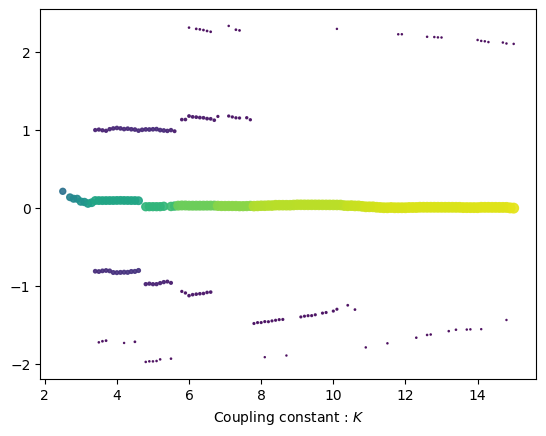

In [13]:
ms = df_temp.reset_index().m.unique()
re_df = df_temp.reset_index()
df_m = re_df[re_df.m == 6]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,len(Ks)))*rstd)
plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy(dtype=float).T),c=cluster_s.to_numpy(dtype=float).T,alpha=0.9,
            s=cluster_s.to_numpy(dtype=float).T*0.1,vmax=500,vmin=0)
plt.xlabel(r'Coupling constant : $K$')

In [23]:
(np.ones((10,len(Ks)))*Ks).shape,(cluster_o.to_numpy().T).shape

((10, 151), (10, 151))